## import library and merge data

In [67]:
# importing libraries
import pandas as pd
import glob
import os
# update git
# merging the files and make sure all csv in one folder
joined_files = os.path.join("/home/yance/Capstone_Project/NewFolder", "indeks*.csv") #make sure all csv in one folder

# A list of all joined files is returned
joined_list = glob.glob(joined_files)

# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=False)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
print(df)


        tanggal                           stasiun pm10 pm25 so2  co  o3 no2  \
0    2021-07-01                DKI1 (Bunderan HI)   55   76  27  14  20  31   
1    2021-07-02                DKI1 (Bunderan HI)   55   70  33  16  14  30   
2    2021-07-03                DKI1 (Bunderan HI)   58   81  33  12  19  25   
3    2021-07-04                DKI1 (Bunderan HI)   68  102  27  11  27  22   
4    2021-07-05                DKI1 (Bunderan HI)   71  106  28  12  34  25   
..          ...                               ...  ...  ...  ..  ..  ..  ..   
150  2021-12-27  DKI5 (Kebon Jeruk) Jakarta Barat   54   76  36  14  21  47   
151  2021-12-28  DKI5 (Kebon Jeruk) Jakarta Barat   44   68  20  11  21  33   
152  2021-12-29  DKI5 (Kebon Jeruk) Jakarta Barat   34   54  28   8  25  29   
153  2021-12-30  DKI5 (Kebon Jeruk) Jakarta Barat   53   75  25  15  23  44   
154  2021-12-31  DKI5 (Kebon Jeruk) Jakarta Barat   60   87  28  19  30  53   

     max critical  
0     76     PM25  
1     70   

## visualize data to see null

<AxesSubplot:>

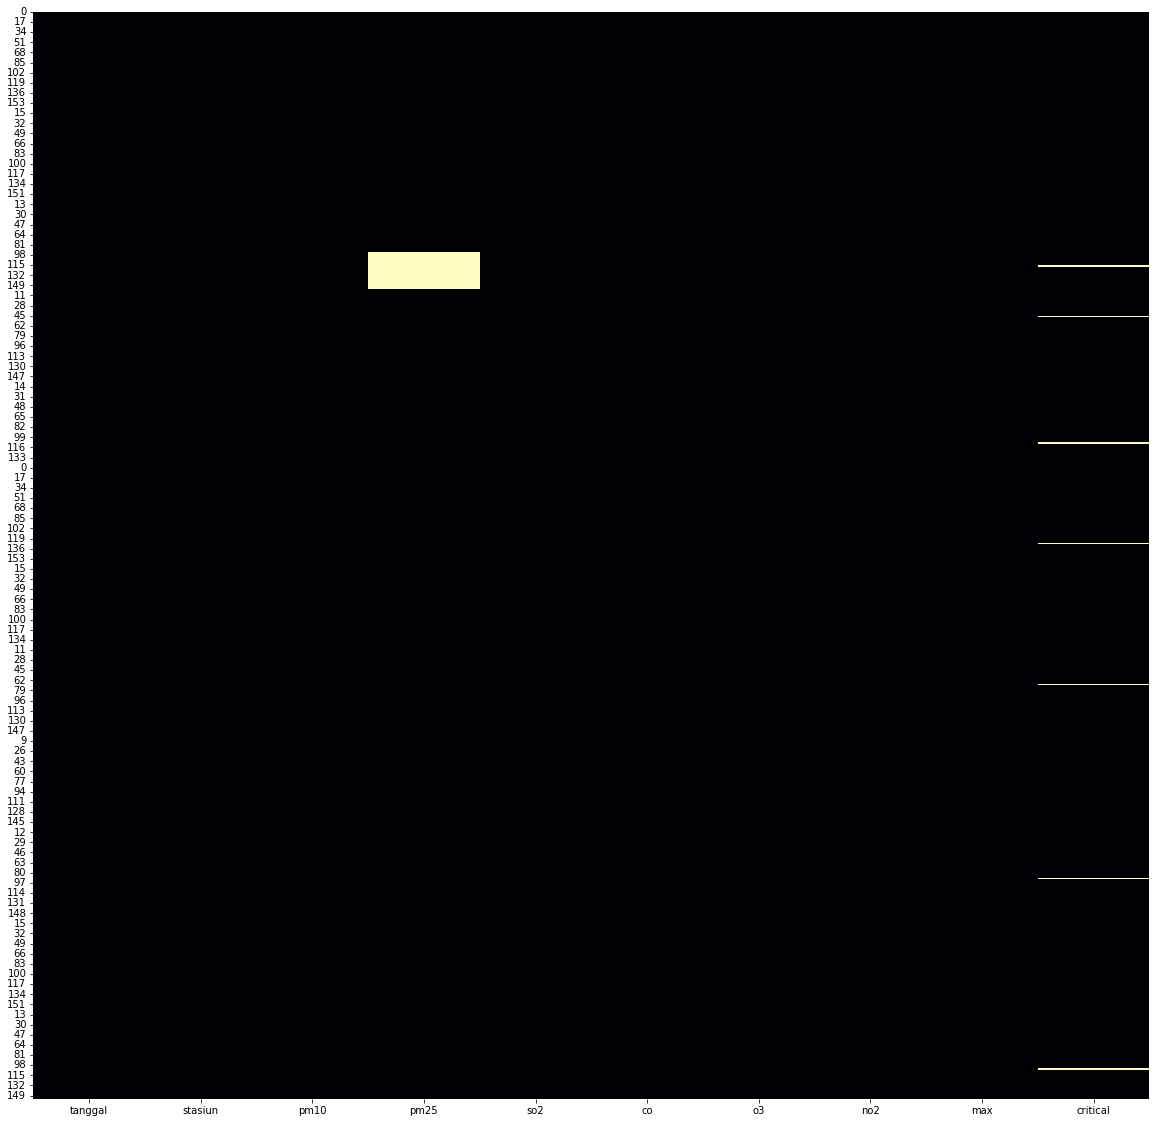

In [68]:
#visualize data
import seaborn as sb
import matplotlib.pyplot as plt

#Creating the heatmap
plt.figure(figsize = (20,20))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')

In [69]:
#import numpy as np
#integer_location = np.where(df.index == 1360)[0][0]
#start = max(0, integer_location - 10)
#end = max(1, integer_location)
#dfRange = df.iloc[start:end]
#dfRange

## sum null data

In [70]:
#sum data
df.isnull().sum()

tanggal      0
stasiun      0
pm10         0
pm25        62
so2          0
co           0
o3           0
no2          0
max          0
critical    16
dtype: int64

In [71]:
#dfa = df['pm25'].mean
##df['pm25'].info
#print(dfa)

## change null in dataset

In [72]:
#df['pm25'] = df['pm25'].mean
#df['critical'] = df['pm25'].mean
df_dropped = df.dropna(how = 'any')
df_new = df
df_new['pm25'] = df_new['pm25'].fillna(76) 
df_new['critical'] = df_new['critical'].fillna(' ')
df.isnull().sum()

tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
dtype: int64

## visualize data to after change null

<AxesSubplot:>

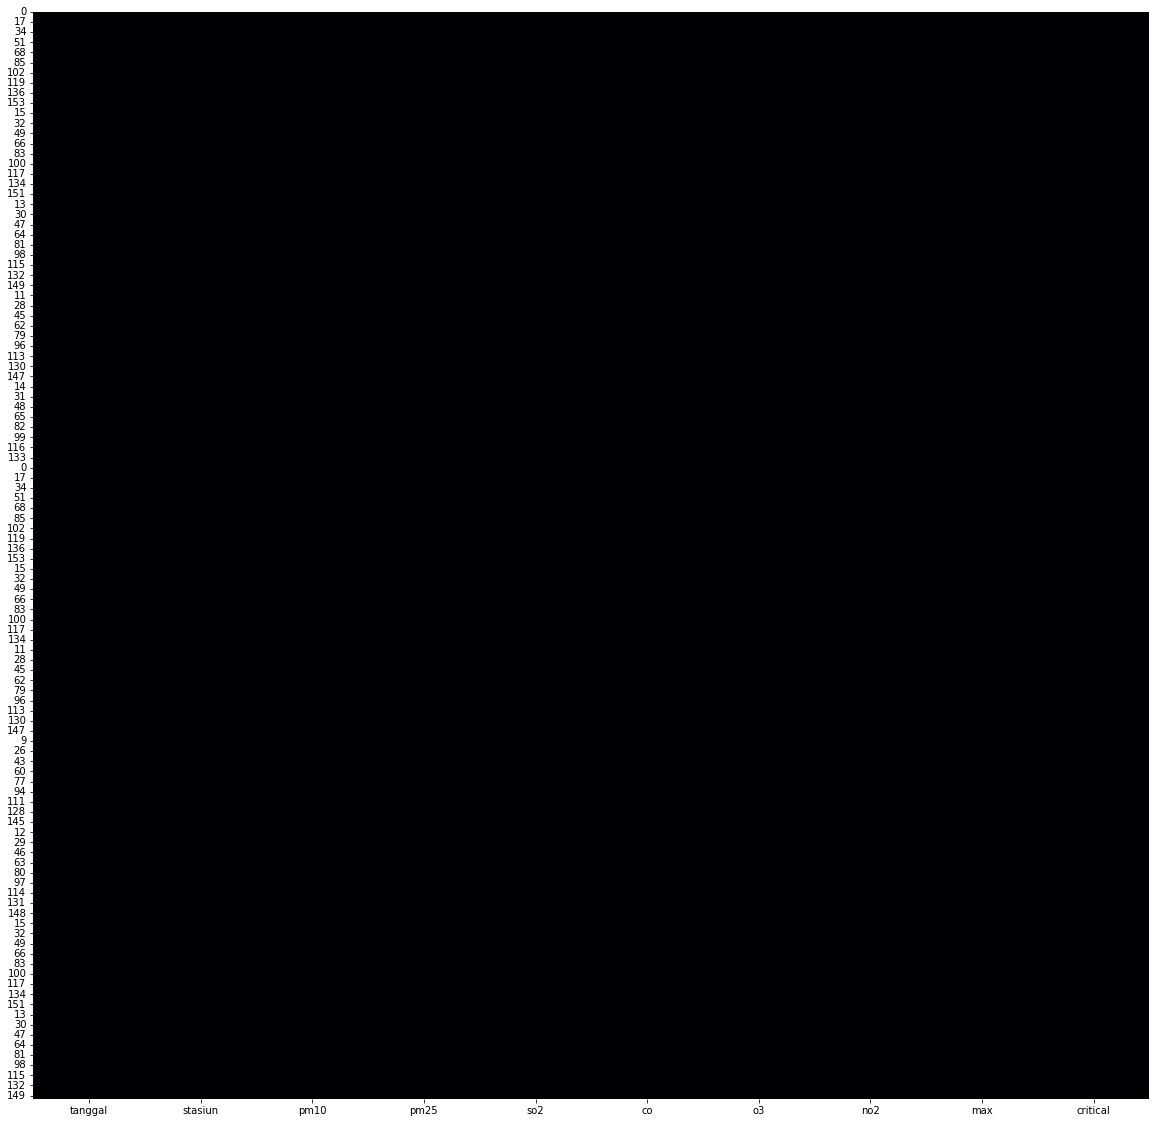

In [73]:
#visualize data
import seaborn as sb
import matplotlib.pyplot as plt

#Creating the heatmap
plt.figure(figsize = (20,20))
sb.heatmap(df_new.isnull(), cbar=False , cmap = 'magma')

## remove the duplicate

In [74]:
# not sure but this remove the duplicate
df_new = df_new.append(df_new.iloc[20:30,:])
df_new = df_new.drop_duplicates()
df_new.duplicated().sum()

/tmp/ipykernel_10236/1852347766.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(df_new.iloc[20:30,:])


0

## Split Data by Stasiun

In [75]:
df_1 = df_new[df_new['stasiun'] == 'DKI1 (Bunderan HI)']
df_1 = df_1.sort_values(by=['tanggal'])
df_1.head

<bound method NDFrame.head of        tanggal             stasiun pm10 pm25 so2  co  o3 no2 max critical
0   2021-01-01  DKI1 (Bunderan HI)   38   53  29   6  31  13  53     PM25
1   2021-01-02  DKI1 (Bunderan HI)   27   46  27   7  47   7  47       O3
2   2021-01-03  DKI1 (Bunderan HI)   44   58  25   7  40  13  58     PM25
3   2021-01-04  DKI1 (Bunderan HI)   30   48  24   4  32   7  48     PM25
4   2021-01-05  DKI1 (Bunderan HI)   38   53  24   6  31   9  53     PM25
..         ...                 ...  ...  ...  ..  ..  ..  ..  ..      ...
26  2021-12-27  DKI1 (Bunderan HI)   52   71  61  15  20  15  71     PM25
27  2021-12-28  DKI1 (Bunderan HI)   51   65  53  15  18  13  65     PM25
28  2021-12-29  DKI1 (Bunderan HI)   31   49  54  10  24  11  54      SO2
29  2021-12-30  DKI1 (Bunderan HI)   55   71  53  16  23  14  71     PM25
30  2021-12-31  DKI1 (Bunderan HI)   62   85  52  23  20  14  85     PM25

[365 rows x 10 columns]>

In [76]:
df_2 = df_new[df_new['stasiun'] == 'DKI2 (Kelapa Gading)']
df_2 = df_2.sort_values(by=['tanggal'])
df_2.head

<bound method NDFrame.head of        tanggal               stasiun pm10 pm25  so2  co  o3 no2 max critical
31  2021-01-01  DKI2 (Kelapa Gading)   38   58    2  11  65   6  65       O3
32  2021-01-02  DKI2 (Kelapa Gading)   29   46  ---  12  80  12  80       O3
33  2021-01-03  DKI2 (Kelapa Gading)   37   59  ---  10  86  13  86       O3
34  2021-01-04  DKI2 (Kelapa Gading)   30   49  ---   9  77   7  77       O3
35  2021-01-05  DKI2 (Kelapa Gading)   35   52  ---   8  77   7  77       O3
..         ...                   ...  ...  ...  ...  ..  ..  ..  ..      ...
57  2021-12-27  DKI2 (Kelapa Gading)   50   66   35  14  40  24  66     PM25
58  2021-12-28  DKI2 (Kelapa Gading)   53   68   38  16  34  33  68     PM25
59  2021-12-29  DKI2 (Kelapa Gading)   28  ---   32  12  37  29  37       O3
60  2021-12-30  DKI2 (Kelapa Gading)   47   64   38  13  38  35  64     PM25
61  2021-12-31  DKI2 (Kelapa Gading)   61   85   33  23  37  44  85     PM25

[365 rows x 10 columns]>

In [77]:
df_3 = df_new[df_new['stasiun'] == 'DKI3 (Jagakarsa)']
df_3 = df_3.sort_values(by=['tanggal'])
df_3.head

<bound method NDFrame.head of        tanggal           stasiun pm10 pm25  so2  co  o3  no2  max critical
62  2021-01-01  DKI3 (Jagakarsa)   43   56   15  10  33    5   56     PM25
63  2021-01-02  DKI3 (Jagakarsa)   58   86   15  22  38    5   86     PM25
64  2021-01-03  DKI3 (Jagakarsa)   64   93   14  20  35    5   93     PM25
65  2021-01-04  DKI3 (Jagakarsa)   50   67   13  15  17    4   67     PM25
66  2021-01-05  DKI3 (Jagakarsa)   59   89   15  19  42    7   89     PM25
..         ...               ...  ...  ...  ...  ..  ..  ...  ...      ...
88  2021-12-27  DKI3 (Jagakarsa)   75  116   35  23  38   21  116     PM25
89  2021-12-28  DKI3 (Jagakarsa)   51   74  ---  13  17   18   74     PM25
90  2021-12-29  DKI3 (Jagakarsa)   47   54   21  12  20    9   54     PM25
91  2021-12-30  DKI3 (Jagakarsa)   60   53   21  15  19   13   60     PM10
92  2021-12-31  DKI3 (Jagakarsa)   64   52   21  44  17  ---   64     PM10

[365 rows x 10 columns]>

In [78]:
df_4 = df_new[df_new['stasiun'] == 'DKI4 (Lubang Buaya)']
df_4 = df_4.sort_values(by=['tanggal'])
df_4.head

<bound method NDFrame.head of         tanggal              stasiun pm10 pm25 so2  co   o3 no2  max critical
93   2021-01-01  DKI4 (Lubang Buaya)   41   76  37  14   35   4   41     PM10
94   2021-01-02  DKI4 (Lubang Buaya)   44   76  38  38   59   3   59       CO
95   2021-01-03  DKI4 (Lubang Buaya)   50   76  37  16   52   5   52       CO
96   2021-01-04  DKI4 (Lubang Buaya)   45   76  36  16   24   3   45     PM10
97   2021-01-05  DKI4 (Lubang Buaya)   52   76  36  15   35   8   52     PM10
..          ...                  ...  ...  ...  ..  ..  ...  ..  ...      ...
119  2021-12-27  DKI4 (Lubang Buaya)   68  121  17  21  ---  12  121     PM25
120  2021-12-28  DKI4 (Lubang Buaya)   59   89  38  15  ---  22   89     PM25
121  2021-12-29  DKI4 (Lubang Buaya)   61   98  37  15  ---  19   98     PM25
122  2021-12-30  DKI4 (Lubang Buaya)   60  102  38  17  ---  21  102     PM25
123  2021-12-31  DKI4 (Lubang Buaya)   58   90  36  21  ---  22   90     PM25

[365 rows x 10 columns]>

In [79]:
df_5 = df_new[df_new['stasiun'] == 'DKI5 (Kebon Jeruk) Jakarta Barat']
df_5 = df_5.sort_values(by=['tanggal'])
df_5.head

<bound method NDFrame.head of         tanggal                           stasiun pm10 pm25 so2  co  o3  no2  \
124  2021-01-01  DKI5 (Kebon Jeruk) Jakarta Barat   37   76  20  12  25    4   
125  2021-01-02  DKI5 (Kebon Jeruk) Jakarta Barat   33   76  18  20  64    6   
126  2021-01-03  DKI5 (Kebon Jeruk) Jakarta Barat   42   76  15  10  62    3   
127  2021-01-04  DKI5 (Kebon Jeruk) Jakarta Barat   27   76  14   7  31    4   
128  2021-01-05  DKI5 (Kebon Jeruk) Jakarta Barat   41   76  15   9  28  ---   
..          ...                               ...  ...  ...  ..  ..  ..  ...   
150  2021-12-27  DKI5 (Kebon Jeruk) Jakarta Barat   54   76  36  14  21   47   
151  2021-12-28  DKI5 (Kebon Jeruk) Jakarta Barat   44   68  20  11  21   33   
152  2021-12-29  DKI5 (Kebon Jeruk) Jakarta Barat   34   54  28   8  25   29   
153  2021-12-30  DKI5 (Kebon Jeruk) Jakarta Barat   53   75  25  15  23   44   
154  2021-12-31  DKI5 (Kebon Jeruk) Jakarta Barat   60   87  28  19  30   53   

    max c

## export to your local

In [80]:
df_1.to_csv('/home/yance/Capstone_Project/dataset/DKI1.csv')
df_2.to_csv('/home/yance/Capstone_Project/dataset/DKI2.csv')
df_3.to_csv('/home/yance/Capstone_Project/dataset/DKI3.csv')
df_4.to_csv('/home/yance/Capstone_Project/dataset/DKI4.csv')
df_5.to_csv('/home/yance/Capstone_Project/dataset/DKI5.csv')
